# Price Channels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-12-01'
end = '2019-04-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,184.460007,184.940002,181.210007,184.820007,184.030731,40802500
2018-12-04,180.949997,182.389999,176.270004,176.690002,175.935455,41344300
2018-12-06,171.759995,174.779999,170.419998,174.720001,173.973862,43098400
2018-12-07,173.490005,174.490005,168.300003,168.490005,167.770477,42281600
2018-12-10,165.000000,170.089996,163.330002,169.600006,168.875732,62026000


In [3]:
df['Upper_Channel_Line'] = df['High'].rolling(20).max()
df['Lower_Channel_Line'] = df['Low'].rolling(20).min()
df['Centerline'] = (df['Upper_Channel_Line'] + df['Lower_Channel_Line']) / 2

In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Upper_Channel_Line,Lower_Channel_Line,Centerline
Date,,,,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,157.245605,37039700,184.940002,146.589996,165.764999
2019-01-03,143.979996,145.720001,142.000000,142.190002,141.582779,91312200,182.389999,142.000000,162.194999
2019-01-04,144.529999,148.550003,143.800003,148.259995,147.626846,58607100,174.779999,142.000000,158.389999
2019-01-07,148.699997,148.830002,145.899994,147.929993,147.298264,54777800,174.490005,142.000000,158.245002
2019-01-08,149.559998,151.820007,148.520004,150.750000,150.106216,41025300,172.570007,142.000000,157.285004


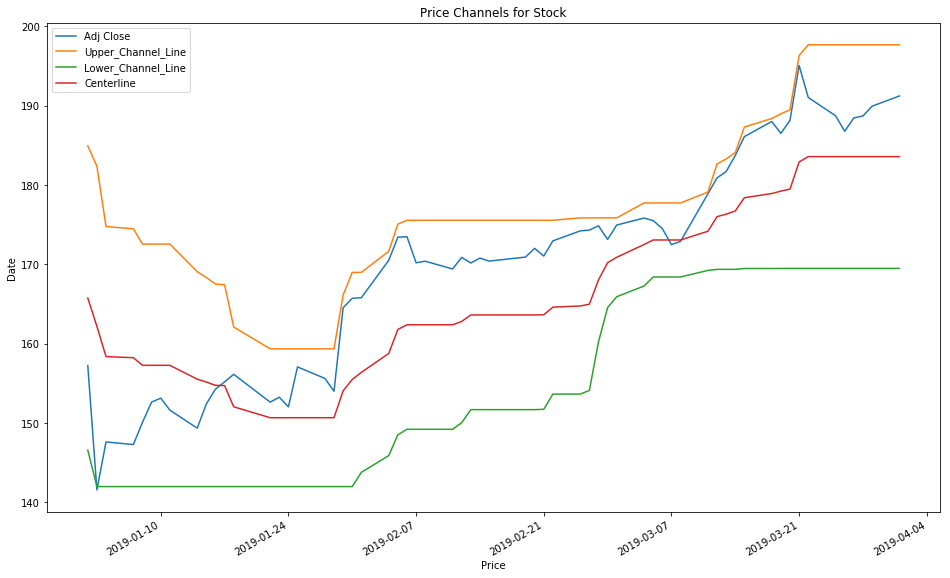

In [5]:
df[['Adj Close','Upper_Channel_Line','Lower_Channel_Line','Centerline']].plot(figsize=(16,10))
plt.title('Price Channels for Stock')
plt.legend(loc='best')
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()

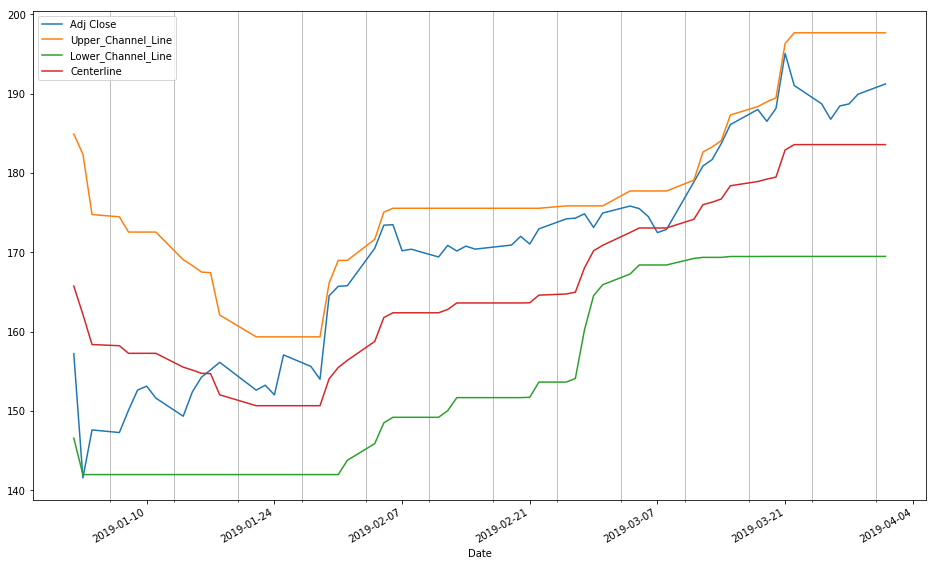

In [6]:
ax = df[['Adj Close','Upper_Channel_Line','Lower_Channel_Line','Centerline']].plot(figsize=(16,10))
xtick = pd.date_range( start=df.index.min(), end=df.index.max(), freq='W')
ax.set_xticks(xtick, minor=True )
ax.grid('on', which='minor', axis='x')
ax.grid('off', which='major', axis='x')

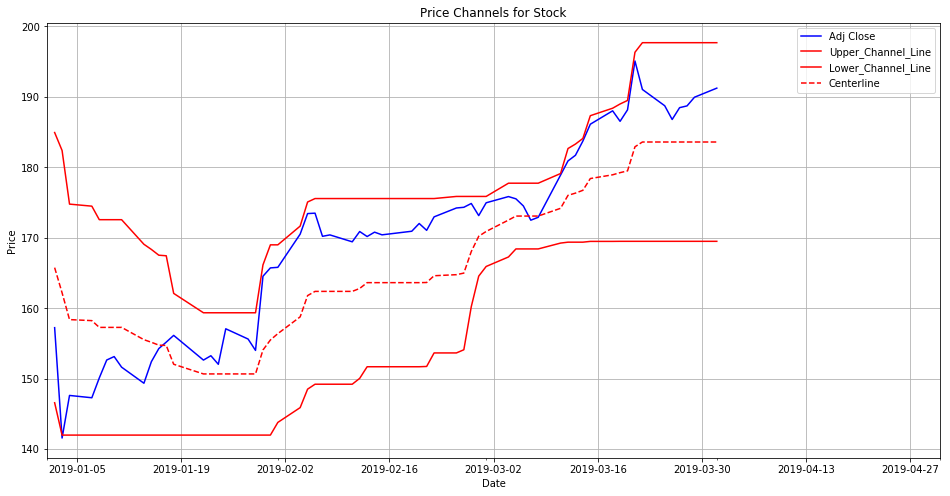

In [7]:
import matplotlib.dates as mdates

months = mdates.MonthLocator()  # every month

fig, ax = plt.subplots(figsize=(16,8))
datemin = np.datetime64(df.index[0], 'M')
datemax = np.datetime64(df.index[-1], 'M') + np.timedelta64(1, 'M')
ax.set_xlim(datemin, datemax)

ax.plot(df.index, df['Adj Close'], color='blue')
ax.plot(df.index, df['Upper_Channel_Line'], color='red')
ax.plot(df.index, df['Lower_Channel_Line'], color='red')
ax.plot(df.index, df['Centerline'], color='red', linestyle='--')
ax.xaxis.set_minor_locator(months)
ax.grid(True)

ax.set_title('Price Channels for Stock')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.legend(loc='best')

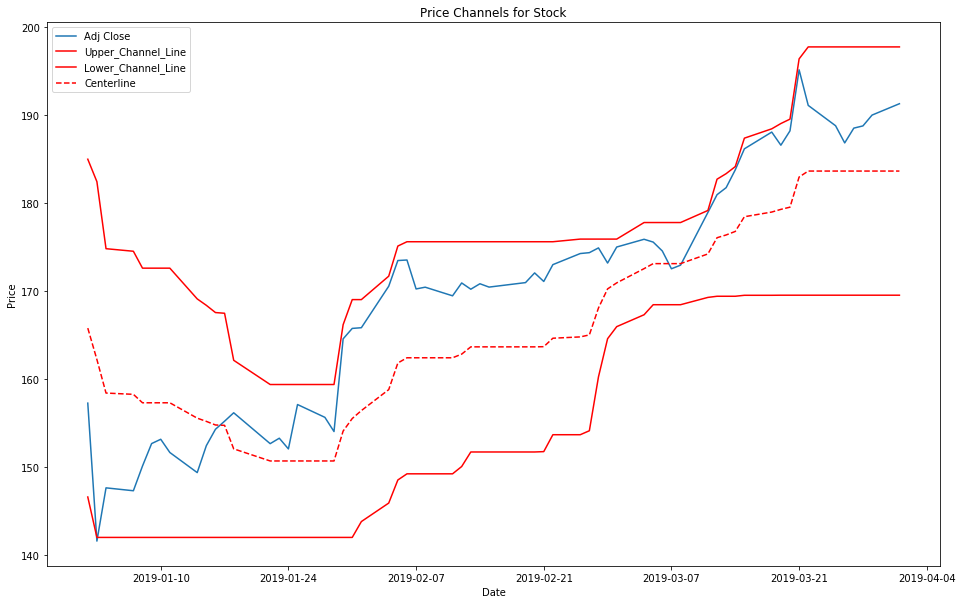

In [8]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['Upper_Channel_Line'], color='r')
plt.plot(df['Lower_Channel_Line'], color='r')
plt.plot(df['Centerline'], color='r', linestyle='--')
plt.title('Price Channels for Stock')
plt.legend(loc='best')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

## Candlestick with Price Channels

In [9]:
from matplotlib import dates as mdates
import datetime as dt


df['VolumePositive'] = df['Open'] < df['Adj Close']
df = df.dropna()
df = df.reset_index()
df['Date'] = mdates.date2num(df['Date'].astype(dt.date))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Upper_Channel_Line,Lower_Channel_Line,Centerline,VolumePositive
0,737061.0,154.889999,158.850006,154.229996,157.919998,157.245605,37039700,184.940002,146.589996,165.764999,True
1,737062.0,143.979996,145.720001,142.000000,142.190002,141.582779,91312200,182.389999,142.000000,162.194999,False
2,737063.0,144.529999,148.550003,143.800003,148.259995,147.626846,58607100,174.779999,142.000000,158.389999,True
3,737066.0,148.699997,148.830002,145.899994,147.929993,147.298264,54777800,174.490005,142.000000,158.245002,False
4,737067.0,149.559998,151.820007,148.520004,150.750000,150.106216,41025300,172.570007,142.000000,157.285004,True


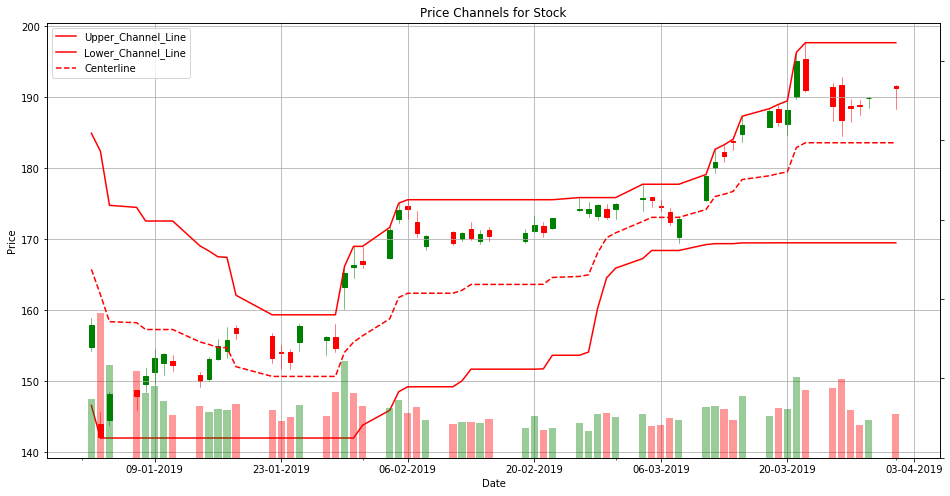

In [10]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import MonthLocator, YearLocator

fig, ax1 = plt.subplots(figsize=(16,8))
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.Date, df['Upper_Channel_Line'], color='red')
ax1.plot(df.Date, df['Lower_Channel_Line'], color='red')
ax1.plot(df.Date, df['Centerline'], color='red', linestyle='--')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')

#yloc = YearLocator()
#ax1.xaxis.set_major_locator(yloc)
mloc = MonthLocator()
ax1.xaxis.set_minor_locator(mloc)
ax1.grid(True)
#ax1.grid(True, which='major', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(True, which='minor', linestyle=':', linewidth='0.5', color='black')

ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Price Channels for Stock')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')

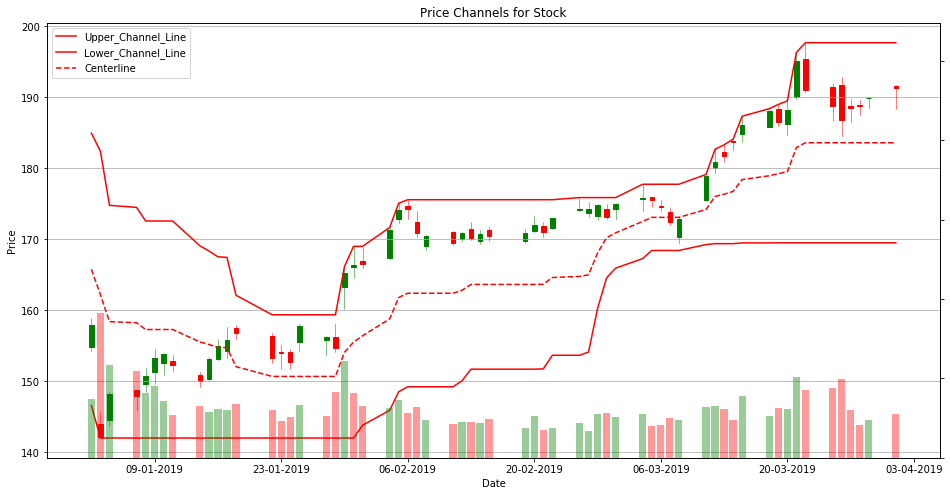

In [15]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import MonthLocator, YearLocator

fig, ax1 = plt.subplots(figsize=(16,8))
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.Date, df['Upper_Channel_Line'], color='red')
ax1.plot(df.Date, df['Lower_Channel_Line'], color='red')
ax1.plot(df.Date, df['Centerline'], color='red', linestyle='--')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
xtick = pd.date_range(start=df.Date.min(), end=df.Date.max(), freq='W')
ax1.grid(True)
ax1.set_xticks(xtick, minor=True)
ax1.grid('on', which='minor', axis='x')
ax1.grid('off', which='major', axis='x')


ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Price Channels for Stock')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')